In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [4]:
# This notebook generates some random, lumpy gaussian-mixture data,
# finds the Bayes decision boundary between class 1 and class 2 
# (Both are lumpy but have lumps in different places in x_1 and x_2)

(1000, 2)

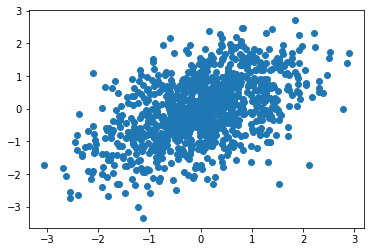

In [5]:
# This isn't connected to the homework, this is just MVN generation.
r = 0.5
a = scipy.stats.multivariate_normal.rvs(mean=[0,0], cov=np.array([[1, r], [r, 1]]), size=1000)
plt.plot(a[:,0], a[:,1], 'o')
a.shape

In [18]:
# Generate means for class 1 and class 2
means1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [19]:
np.ones((10,2)) * [0,1]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [8]:
n_clusters = 10
finestd = 0.2
clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,1])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [1,0])


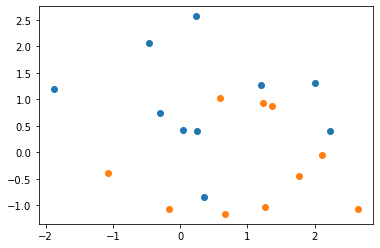

In [9]:
plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')

In [10]:
def generate_samples(n): 
    index1 = np.random.randint(n_clusters, size=n).astype(int)
    index2 = np.random.randint(n_clusters, size=n).astype(int)
    means1 = clusters_1[index1]
    means2 = clusters_2[index2]
    samples1=np.random.randn (n,2) * finestd + means1
    samples2=np.random.randn (n,2) * finestd + means2
    return(samples1, samples2)

In [20]:
test1, test2 = generate_samples(1000)
train1, train2 = generate_samples(100)

Xtest = np.vstack([test1, test2])
Ytest = np.vstack([np.ones((test1.shape[0],1))*1, np.ones((test2.shape[0],1))*2])


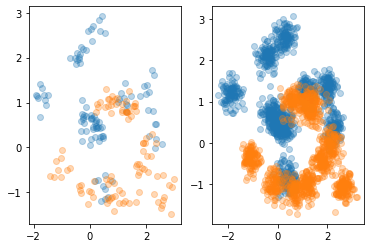

In [21]:
plt.subplot(121)
plt.plot(train1[:,0], train1[:,1], 'o', alpha=0.3)
plt.plot(train2[:,0], train2[:,1], 'o', alpha=0.3)
plt.subplot(122)
plt.plot(test1[:,0], test1[:,1], 'o', alpha=0.3)
plt.plot(test2[:,0], test2[:,1], 'o', alpha=0.3)

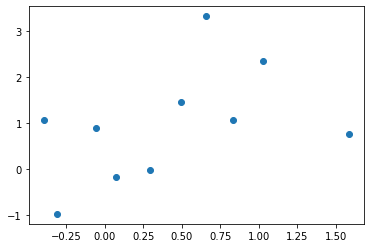

In [22]:
plt.plot(means1[:,0], means1[:,1],'o')

In [23]:
def prob_class1(x):
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd) ) )
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) )

    c1 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) 
    c2 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_2, scale=finestd) ) 
    return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

[[2.87834273e-27 2.37161629e-01]
 [9.59291073e-01 3.08354770e-36]
 [3.20953528e-08 4.07794650e-09]
 [6.86492482e-01 1.91007845e-03]
 [1.38730969e-19 3.62523411e-08]
 [2.48880366e-22 9.62046060e-10]
 [3.87988151e-01 2.91367339e-04]
 [1.36993379e-01 1.22655260e-23]
 [9.07862169e-01 2.74419088e-01]
 [1.94811704e+00 1.93389665e-01]]
[[2.87834273e-27 2.37161629e-01]
 [9.59291073e-01 3.08354770e-36]
 [3.20953528e-08 4.07794650e-09]
 [6.86492482e-01 1.91007845e-03]
 [1.38730969e-19 3.62523411e-08]
 [2.48880366e-22 9.62046060e-10]
 [3.87988151e-01 2.91367339e-04]
 [1.36993379e-01 1.22655260e-23]
 [9.07862169e-01 2.74419088e-01]
 [1.94811704e+00 1.93389665e-01]]


5.733916191090893

In [24]:
print(clusters_1.shape, clusters_2.shape)

(10, 2) (10, 2)


In [25]:
def prob_class1(x):
    c1 =0
    c2 = 0
    for i in range(clusters_1.shape[0]):
        c1 = c1 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_1[i,:], cov=np.eye(clusters_1.shape[1]) * finestd )  
    for i in range(clusters_2.shape[0]):
        c2 = c2 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_2[i,:], cov=np.eye(clusters_2.shape[1]) * finestd )  
    #return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

0.9150164652648626

In [26]:
xgrid = np.linspace(-4,4,110) # range for x1ygrid = np.linspace(-4,4,100)  # range for x2
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= prob_class1(x)

(110, 100) (110, 100) (110, 100)


<ipython-input-27-b66a50d01399>:5: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap="seismic")


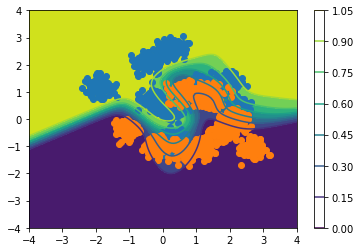

In [27]:
CS = plt.contourf(xax, yax, z) # , levels=[0, 0.25, 0.5, 0.75, 1.0], cmap="seismic")
plt.scatter(test1[:,0], test1[:,1])
plt.scatter(test2[:,0], test2[:,1])
CS = plt.contour(xax, yax, z) 
plt.colorbar(cmap="seismic")
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

<ipython-input-35-aa684e51f90b>:4: UserWarning: The following kwargs were not used by contour: 'color', 'width'
  CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2)


Text(0.5, 1.0, 'Decision boundary when density is known')

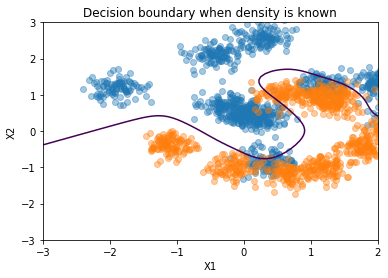

In [35]:
plt.scatter(test1[:,0], test1[:,1], alpha=0.4)
plt.scatter(test2[:,0], test2[:,1], alpha=0.4)
#CS = plt.contour(xax, yax, z, ) 
CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2) 
plt.xlim(-3,2 )
plt.ylim(-3,3)
plt.xlabel("X1"); plt.ylabel("X2")
plt.title("Decision boundary when density is known")

In [36]:
sample_prob = prob_class1( Xtest)
sample_prob.shape

(2000,)

In [37]:
sample_prob[0:4], Ytest[0:5]

(array([0.48707459, 0.94423323, 0.99979567, 0.89935282]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [38]:
# Evaluate the number of the testing points that would have been classified
# correctly using the Bayes pick-the-most-likely-category rule.

bayes_error_est = np.sum(np.equal(sample_prob < 0.5, Ytest[0])) / len(Ytest)
bayes_error_est

0.574

In [ ]:
# 57% is surprisingly low for clusters that seem to be well separated.

In [39]:
Ytest.shape, Xtest.shape

((2000, 1), (2000, 2))

In [40]:
from sklearn.neighbors import KNeighborsClassifier
test1.shape, test2.shape
# Don't have to worry about distance matrices since x1 and x2 have the same scale.

((1000, 2), (1000, 2))

In [42]:
# assemble the matrices into the right shapes
X   = np.vstack ( [ train1, train2])
Y   = np.vstack ( [ np.ones((train1.shape[0],1)), 
                    np.ones((train2.shape[0],1))*2 ])

In [43]:
k = np.arange(1,151, 2)
dof = 2 * 200 / k

In [44]:
X.shape, Y.shape

((200, 2), (200, 1))

In [45]:
k = []
fit=[]
for i in range(1,151,2):
    k.append(i)
    fit.append(KNeighborsClassifier(n_neighbors= i ).fit(X, Y.ravel()) )

In [46]:
fit

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=7),
 KNeighborsClassifier(n_neighbors=9),
 KNeighborsClassifier(n_neighbors=11),
 KNeighborsClassifier(n_neighbors=13),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=17),
 KNeighborsClassifier(n_neighbors=19),
 KNeighborsClassifier(n_neighbors=21),
 KNeighborsClassifier(n_neighbors=23),
 KNeighborsClassifier(n_neighbors=25),
 KNeighborsClassifier(n_neighbors=27),
 KNeighborsClassifier(n_neighbors=29),
 KNeighborsClassifier(n_neighbors=31),
 KNeighborsClassifier(n_neighbors=33),
 KNeighborsClassifier(n_neighbors=35),
 KNeighborsClassifier(n_neighbors=37),
 KNeighborsClassifier(n_neighbors=39),
 KNeighborsClassifier(n_neighbors=41),
 KNeighborsClassifier(n_neighbors=43),
 KNeighborsClassifier(n_neighbors=45),
 KNeighborsClassifier(n_neighbors=47),
 KNeighborsClassifier(n_neighbors=49),
 KNeighborsClassifier(n_neighbors=51),
 KNe

In [344]:

o = []
o2 = []
for f in fit:
    acc = np.equal(f.predict(Xtest), Ytest[:,0]).sum()
    acc2 = np.equal(f.predict(X), Y[:,0]).sum()
    o2.append(acc2)    
    o.append(acc)
    print(f.n_neighbors, acc, acc2)


1 1753 200
3 1810 189
5 1814 184
7 1813 187
9 1804 182
11 1805 184
13 1794 183
15 1782 181
17 1741 182
19 1713 180
21 1706 180
23 1701 179
25 1694 175
27 1687 171
29 1673 171
31 1660 169
33 1654 167
35 1636 164
37 1630 164
39 1637 164
41 1659 164
43 1647 163
45 1614 161
47 1589 155
49 1572 155
51 1552 155
53 1529 151
55 1529 150
57 1478 138
59 1456 135
61 1451 137
63 1463 137
65 1466 137
67 1469 136
69 1455 135
71 1435 133
73 1411 127
75 1378 125
77 1352 120
79 1331 113
81 1349 116
83 1321 102
85 1321 104
87 1355 110
89 1359 111
91 1356 111
93 1360 113
95 1367 112
97 1367 114
99 1350 111
101 1354 112
103 1365 112
105 1373 112
107 1371 115
109 1376 114
111 1388 114
113 1389 111
115 1389 111
117 1386 111
119 1394 114
121 1389 114
123 1345 109
125 1347 109
127 1349 109
129 1357 113
131 1372 114
133 1416 120
135 1381 117
137 1404 120
139 1413 123
141 1418 124
143 1421 121
145 1428 123
147 1429 125
149 1454 125


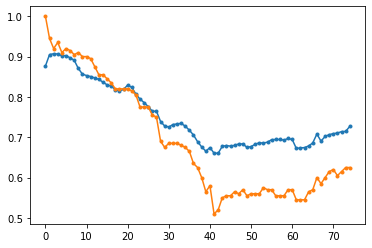

In [350]:
plt.plot(np.array(o)/2000, '.-')
plt.plot(np.array(o2)/200, '.-')

In [47]:
# Note our attention should be between k=1 and k=10, 
# the range of k with the highest accuracy.

# On this graph, overfitting is to the left and 
# overregularlization is to the right.

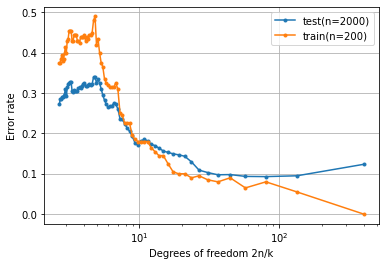

In [364]:
plt.plot(dof, 1-np.array(o)/2000, '.-', label="test(n=2000)")
plt.plot(dof, 1-np.array(o2)/200, '.-', label="train(n=200)")
plt.semilogx() ; plt.grid()
plt.xlabel("Degrees of freedom 2n/k")
plt.ylabel("Error rate")
plt.legend()
plt.savefig("GENERALIZATION.png")

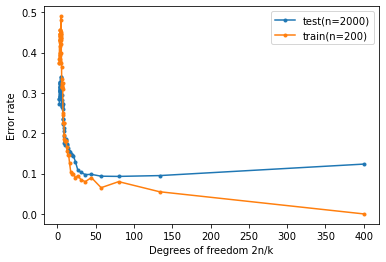

In [366]:
plt.plot(dof, 1-np.array(o)/2000, '.-', label="test(n=2000)")
plt.plot(dof, 1-np.array(o2)/200, '.-', label="train(n=200)")
#plt.semilogx() ; plt.grid()
plt.xlabel("Degrees of freedom 2n/k")
plt.ylabel("Error rate")
plt.legend()
